# Palatalization, /j/, and rhyme

## Description

/j/ can rhyme with any palatalized consonant, e.g., /MiNA/ ~ /iJA/ (меня ~ и я), but palatalized consonants do not automatically rhyme with one another. That is, rhymes of this type are not transitive; if A rhymes with B and A rhymes with C, it is not possible to conclude that B rhymes with C.

To address this problem we artificially adjust the values of palatalized consonants to reduce their distance from /j/. Below we explore strategies for making this information available to the system.

## Import libraries

In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(color_codes=True)

## Decompose palatalized consonents into C + /j/

One approach involves treating palatalized consonants as if they were sequences of C + /j/, e.g., palatalized /l′/ is rewritten as /lj/. Because our general methods treat consonant clusters as averages of their features values, this strategy averages the property values of the consonant with those of /j/.

### Prepare data

In [2]:
df = pd.DataFrame([
    ["j",0,0,1,0,1,1,0,1,1,0,0],
    ["l",0,1,1,1,1,0,0,1,1,1,0],
    ["l′",0,1,1,1,1,1,0,1,1,1,0],
    ["lj",0,0.5,1,0.5,1,0.5,0,1,1,0.5,0],
    ["n",0,1,1,1,1,0,1,1,0,0,0],
    ["n′",0,1,1,1,1,1,1,1,0,0,0],
    ["nj",0,0.5,1,0.5,1,0.5,0.5,1,0.5,0,0]
])
df.columns = ["Segment", "Syllabic", "Consonantal", "Sonorant", "Anterior", "Coronal", "Palatalized",
             "Nasal", "Voiced", "Continuant", "Lateral", "Delayed"]
df.set_index("Segment", inplace=True)
df

,Syllabic,Consonantal,Sonorant,Anterior,Coronal,Palatalized,Nasal,Voiced,Continuant,Lateral,Delayed
Segment,,,,,,,,,,,
j,0,0.0,1,0.0,1,1.0,0.0,1,1.0,0.0,0
l,0,1.0,1,1.0,1,0.0,0.0,1,1.0,1.0,0
l′,0,1.0,1,1.0,1,1.0,0.0,1,1.0,1.0,0
lj,0,0.5,1,0.5,1,0.5,0.0,1,1.0,0.5,0
n,0,1.0,1,1.0,1,0.0,1.0,1,0.0,0.0,0
n′,0,1.0,1,1.0,1,1.0,1.0,1,0.0,0.0,0
nj,0,0.5,1,0.5,1,0.5,0.5,1,0.5,0.0,0


### Plot all data, including integral (non-decomposed) palatalized consonants

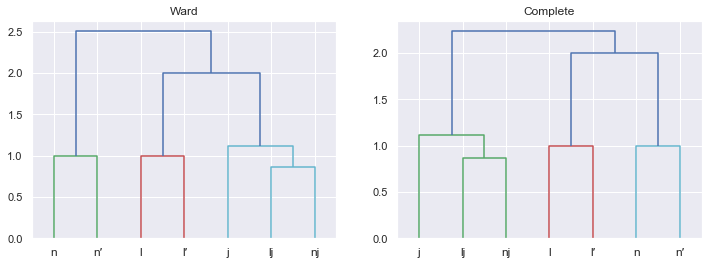

In [3]:
ward = linkage(df, method="ward")
complete = linkage(df, method="complete")
labelList = list(df.index) # segments
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
dendrogram(ward, labels=labelList)
plt.title("Ward")
plt.subplot(1,2,2)
dendrogram(complete, labels=labelList)
plt.title("Complete")
plt.show()

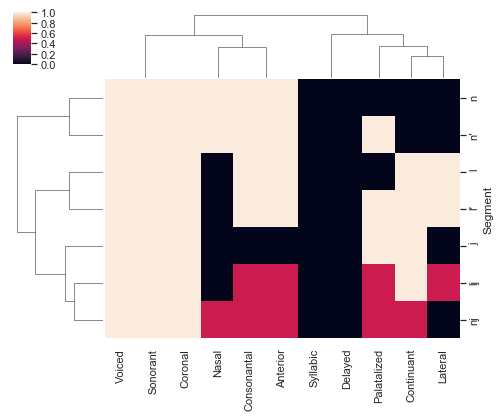

In [4]:
g = sns.clustermap(df, method="ward", figsize=(8,6))

### Discussion

Correctly recognizes that /j/ is close to /lj/ and /nj/. Incorrectly regards /lj/ and /nj/ as close to each other.

### Plot the same without the integral palatalized consonants

By removing the phonetically correct integral palatalized consonants, we can see the clustering of plain consonants, /j/, and C + /j/ more easily.

In [5]:
df_drop_palatalized = df.drop(["l′", "n′"])
df_drop_palatalized

,Syllabic,Consonantal,Sonorant,Anterior,Coronal,Palatalized,Nasal,Voiced,Continuant,Lateral,Delayed
Segment,,,,,,,,,,,
j,0,0.0,1,0.0,1,1.0,0.0,1,1.0,0.0,0
l,0,1.0,1,1.0,1,0.0,0.0,1,1.0,1.0,0
lj,0,0.5,1,0.5,1,0.5,0.0,1,1.0,0.5,0
n,0,1.0,1,1.0,1,0.0,1.0,1,0.0,0.0,0
nj,0,0.5,1,0.5,1,0.5,0.5,1,0.5,0.0,0


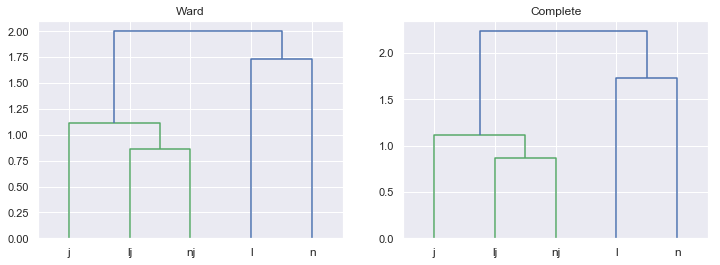

In [6]:
ward = linkage(df_drop_palatalized, method="ward")
complete = linkage(df_drop_palatalized, method="complete")
labelList = list(df_drop_palatalized.index) # segments
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.title("Ward")
dendrogram(ward, labels=labelList)
plt.subplot(1,2,2)
plt.title("Complete")
dendrogram(complete, labels=labelList)
plt.show()

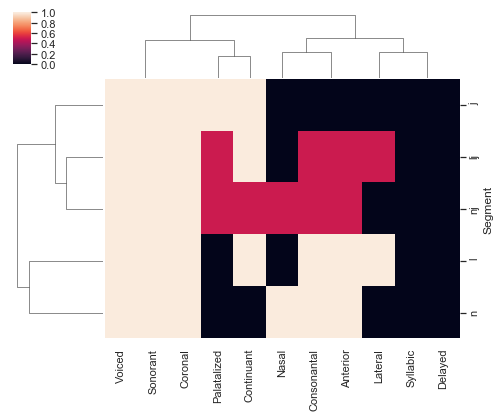

In [7]:
g = sns.clustermap(df_drop_palatalized, method="ward", figsize=(8,6))
plt.show()

### Discussion

As above, correctly associates the decomposed palatalized consonants with /j/, but incorrectly associates them with each other.

### Plot instead without decomposition into Cj

Does decomposition give better results than using the actual phonetic features? 

In [8]:
df_drop_decomposed = df.drop(["lj", "nj"])
df_drop_decomposed

,Syllabic,Consonantal,Sonorant,Anterior,Coronal,Palatalized,Nasal,Voiced,Continuant,Lateral,Delayed
Segment,,,,,,,,,,,
j,0,0.0,1,0.0,1,1.0,0.0,1,1.0,0.0,0
l,0,1.0,1,1.0,1,0.0,0.0,1,1.0,1.0,0
l′,0,1.0,1,1.0,1,1.0,0.0,1,1.0,1.0,0
n,0,1.0,1,1.0,1,0.0,1.0,1,0.0,0.0,0
n′,0,1.0,1,1.0,1,1.0,1.0,1,0.0,0.0,0


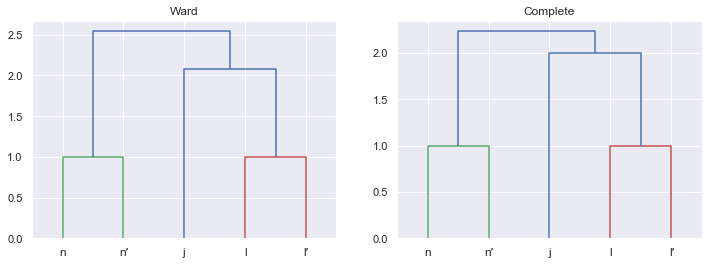

In [9]:
ward = linkage(df_drop_decomposed, method="ward")
complete = linkage(df_drop_decomposed, method="complete")
labelList = list(df_drop_decomposed.index) # segments
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
dendrogram(ward, labels=labelList)
plt.title("Ward")
plt.subplot(1,2,2)
dendrogram(complete, labels=labelList)
plt.title("Complete")
plt.show()

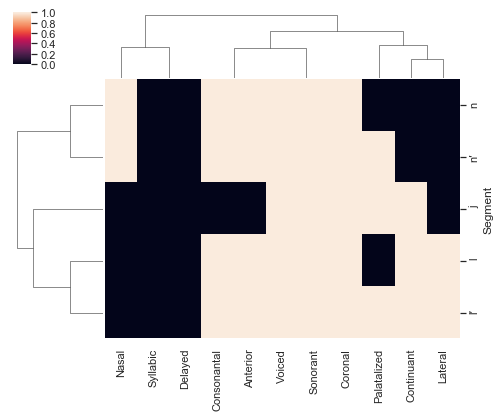

In [10]:
g = sns.clustermap(df_drop_decomposed, method="ward", figsize=(8,6))
plt.show()

### Discussion

This method correctly recognizes that the liquids and nasals are not close to each other, but it incorrectly regards palatalized consonants as closer to their otherwise homorganic non-palatalized consonants than they are to /j/, although they rhyme freely with the latter and not with the former. It also regards /j/ as closer to the liquids than to the nasals, which is correct in terms of feature values, although it is unclear whether there is any differenc ein rhyming practice.

## Add *rhymes with X* features

As an alternative, do not decompose palatalized consonants but do add *rhymes with X* features to all segments, where *x* is the set of all palatal and palatalized consonants. Every segment rhymes only with itself, except that /j/ rhymes with all candidates. That is, the features are symmetrical: the only thing that rhymes with /j/ is /j/ itself. The goal is to reduce the distance between /j/ and all palatalized consonants without inadvertently reducing the pairwise distance between those consonants.

### Prepare data

In [11]:
df = pd.DataFrame([
    ["j",0,0,1,0,1,1,0,1,1,0,0,1,1,1],
    ["l",0,1,1,1,1,0,0,1,1,1,0,0,0,0],
    ["l′",0,1,1,1,1,1,0,1,1,1,0,1,0,0],
    ["n",0,1,1,1,1,0,1,1,0,0,0,0,0,0],
    ["n′",0,1,1,1,1,1,1,1,0,0,0,1,0,0]
])
df.columns = ["Segment", "Syllabic", "Consonantal", "Sonorant", "Anterior", "Coronal", "Palatalized",
             "Nasal", "Voiced", "Continuant", "Lateral", "Delayed", "RW_l′", "RW_n′", "RW_j"]
df.set_index("Segment", inplace=True)
df

,Syllabic,Consonantal,Sonorant,Anterior,Coronal,Palatalized,Nasal,Voiced,Continuant,Lateral,Delayed,RW_l′,RW_n′,RW_j
Segment,,,,,,,,,,,,,,
j,0,0,1,0,1,1,0,1,1,0,0,1,1,1
l,0,1,1,1,1,0,0,1,1,1,0,0,0,0
l′,0,1,1,1,1,1,0,1,1,1,0,1,0,0
n,0,1,1,1,1,0,1,1,0,0,0,0,0,0
n′,0,1,1,1,1,1,1,1,0,0,0,1,0,0


### Plot

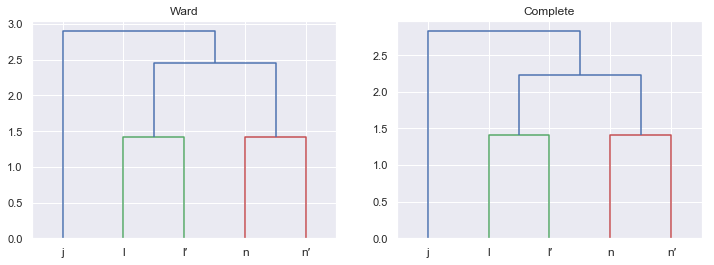

In [12]:
ward = linkage(df, method="ward")
complete = linkage(df, method="complete")
labelList = list(df.index) # segments
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
dendrogram(ward, labels=labelList)
plt.title("Ward")
plt.subplot(1,2,2)
dendrogram(complete, labels=labelList)
plt.title("Complete")
plt.show()

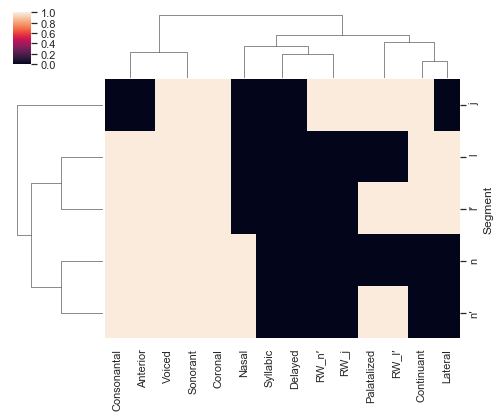

In [13]:
g = sns.clustermap(df, method="ward", figsize=(8,6))
plt.show()

### Discussion

Adding the *rhymes with X* feature does not affect the clustering because this single feature is of less importance than the rest.

## General discussion

Although this artificially small test case may not be fully representative of actual data, we observe that:

1. Decomposing palatalized consonants into C + /j/ makes them meaningfully close to /j/ for clustering purposes, but incorrectly makes them  closer to one another. 
1. Adding the *rhymes with X* feature has no meaningful impact on the clustering.